In [30]:
import pandas as pd
import numpy as np
import matplotlib
pd.set_option('display.max_rows', 500)

%matplotlib inline
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.cross_validation import LabelKFold
from scipy import interp
from sklearn import cross_validation
import pylab as pl

from sklearn import svm
from sklearn.metrics import roc_curve, auc
from os import environ
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

C:\Program Files\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [31]:
df = pd.read_csv("c:\\temp\\all_df.csv")
list(df)

['Unnamed: 0',
 'Unnamed: 0.1',
 'avg_turn_secs',
 'avg_turn_words',
 'dialog',
 'end',
 'href',
 'id',
 'niteType',
 'p_da',
 'p_speaker',
 'precent_secs_sofar',
 'precent_words_sofar',
 'secs',
 'speaker',
 'start',
 'swbdType',
 'tend',
 'tid',
 'time_control',
 'time_sofar',
 'tstart',
 'words',
 'words_control',
 'words_sofar']

In [32]:
df2 = df[['dialog','id','tid','precent_secs_sofar','secs','precent_words_sofar','words_control','time_control','speaker','p_speaker','p_da','swbdType']]
df3 =df2.dropna()

In [33]:
#remove the dates
df3['tchange'] = 0
ds = df3['tchange'].copy()
for index,row in df3.iterrows() :
   p_s = row['p_speaker']
   current_speaker = row['speaker']
   if not p_s == current_speaker:
        ds[index] = 1       
 
df3['tchange'] = ds        
df3

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,dialog,id,tid,precent_secs_sofar,secs,precent_words_sofar,words_control,time_control,speaker,p_speaker,p_da,swbdType,tchange
3,sw2032,da4,t3,277.947246,3.872500,144.444444,90.0,77.268631,A,B,aa,qr,1
4,sw2032,da7,t5,9.148744,0.240875,9.090909,95.0,92.778328,A,A,qr,ba,0
5,sw2032,da5,t4,1394.236048,5.714625,1800.000000,10.0,22.731369,B,B,aa,sd@,0
6,sw2032,da8,t5,50.548355,1.090000,72.727273,95.0,92.778328,A,A,qr,qy,0
7,sw2032,da6,t4,2028.087832,1.552500,3500.000000,10.0,22.731369,B,A,qy,+,1
8,sw2032,da9,t6,336.688015,1.380000,800.000000,3.0,5.849925,B,A,qy,sd,1
9,sw2032,da10,t6,583.104605,1.010000,1300.000000,3.0,5.849925,B,B,+,sd,0
10,sw2032,da11,t6,749.527295,0.682125,1500.000000,3.0,5.849925,B,B,sd,%-,0
11,sw2032,da12,t7,39.565687,0.870000,30.000000,40.0,35.868280,A,B,%-,qy,1
12,sw2032,da14,t8,7.121888,0.280000,6.666667,60.0,64.131720,B,A,qy,nn,1


In [35]:
dact_map = {
 'sd'  : 'SD',
 'b'   : 'B',
'sv'   : 'SV',
'aa'   : 'AA',
'%'    : '%' ,
'ba'   : 'SD',
'qy'   : 'Q',
'x'    : 'B',
'ny'   : 'A',
'fc'   : 'NA',
'uh'   : 'B',
'qw'   : 'Q',
'nn'   : 'A',
'bk'   : 'B',
'h'    : 'SD',
'qy^d' : 'Q',
'fw'   : 'Other',
'bh'   : 'B',
'^q'   : 'SD',
'bf'   : 'SD',
'ny^e' : 'A',
'ad' : 'SV',
'^2' : 'NA',
'b^m' : 'NA',
'qo' : 'Q',
'qh' : 'Q',
'^h' : 'A',
'ar' : 'A',
'nn^e' : 'A',
'ng' : 'A',
'br' : 'SD',
'no' : 'A',
'fp' : 'NA',
'qrr' : 'Q',
'arp' :'A',
't3' :'NA',
'oo' : 'NA',
'cc' : 'NA',
'co' : 'NA',
't1' : 'SD',
'bd' : 'SD',
'aap' : 'A',
'am'  : 'A' , 
'^g' : 'Q',
'qw^d': 'Q',
'fa' :'SD',
'%-' : '%', 
'aa^r' :'AA', 
'+@' : '+', 
'b^r':'B', 
'fe' : 'NA', 
'sd@' : 'SD', 
'o' :'NA', 
'sd(^q)' :'SD', 
'qy^t':'Q', 
'na^t' :'NA', 
'sd^e' : 'SD', 
'qr' : 'Q',
'sd^r' : 'SD', 
'na' : 'NA', 
'^h@':'NA', 
'sd^t' : 'SD', 
'fc^m' : 'NA', 
'qy^g^t' : 'Q', 
'br^m' : 'Q', 
'sv^r' : 'SV',
'sv^t' :'SV', 
'sd^c' : 'SD', 
'qy^h' : 'Q', 
'qw^t' : 'Q', 
'qy^g' : 'Q', 
'o@' :'NA', 
'ad^t' : 'AD', 
'nd' :'A', 
'sd^m' :'SD',
'"' : 'NA', 
'sv^e' :'SV', 
'sv(^q)' : 'SV', 
'%@' : '%', 
'ba^r' :'B', 
'^q@' :'Q', 
'qy^d^r' : 'Q', 
'nd^t': 'A',
't1^t' : 'NA', 
'qw^h' : 'Q', 
'ny^r' :'A', 
'^2@' : 'NA', 
'qy@' : 'Q', 
'ar^r' : 'B', 
'bk^r' :'B', 
'Other':'NA',
'nn^r' : 'NA', 
'b@':'B', 
'o^r' : 'NA', 
'bh^r' :'B', 
'bc' :'B', 
'qo^t' : 'Q', 
'sd*' : 'SD', 
'sv@' : 'SV', 
'sv^m' : 'SV',
'qy^m' : 'Q', 
'b^m@' :'B', 
'bh^m' :'B', 
'qy^c' : 'Q', 
'sv^c' : 'SV', 
'qy^c^r' : 'Q', 
'qw^d^c' : 'Q',
'qy^g^c' : 'Q', 
'qy^d@'  : 'Q', 
'ft':'NA', 
'sd^e^m' : 'SD', 
'aa^2' :'AA', 
'aa^m' :'AA', 
'qr^t' :'Q', 
'fc^t' :'NA',
'+*' :'+', 
'bk^m':'B' , 
'fc^r' : 'NA', 
'qy^r' : 'Q', 
'na^m' :'A', 
'sv^2' : 'SV', 
'ba@' : 'B', 
'sd^2' :'SD', 
'aa@' : 'AA',
'na^r' : 'NA', 
'sd(^q)^t' : 'SD', 
'na@' : 'NA', 
'qrr^t' : 'Q', 
'sd^e^t' : 'SD', 
'by' : 'B', 
'ad(^q)': 'AD', 
'no@' : 'A',
'ft^m' : 'NA', 
'qy^2' : 'Q',    
'Other' : 'NA',
'sd(^q)*' : 'SD', 
'qh^c' : 'Q',
'am^r' : 'A', 
'bf^t' : 'B', 
'br^r' : 'B', 
'Other' : 'NA', 
'qw^r' :'Q', 
'ad^c' : 'AD', 
'sd^e@' : 'SD',
'ng^m'  : 'A', 
'qr^d' : 'Q', 
'bf^g' : 'B', 
'nn^m' : 'B', 
'ft^t' : 'NA', 
'qh^g' : 'Q'   
  
}
#replace my da
s_da = df3['swbdType']
new_s_da = s_da.replace(dact_map)
# The values 10 and 20 are replaced by 'A' and 'B'
s_p_da = df3['p_da']
new_s_p_da = s_p_da.replace(dact_map)

df3['new_da'] = new_s_da
df3['new_p_da'] = new_s_p_da

df3.head()

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,dialog,id,tid,precent_secs_sofar,secs,precent_words_sofar,words_control,time_control,speaker,p_speaker,p_da,swbdType,tchange,new_da,new_p_da
3,sw2032,da4,t3,277.947246,3.872500,144.444444,90.0,77.268631,A,B,aa,qr,1,Q,AA
4,sw2032,da7,t5,9.148744,0.240875,9.090909,95.0,92.778328,A,A,qr,ba,0,SD,Q
5,sw2032,da5,t4,1394.236048,5.714625,1800.000000,10.0,22.731369,B,B,aa,sd@,0,SD,AA
6,sw2032,da8,t5,50.548355,1.090000,72.727273,95.0,92.778328,A,A,qr,qy,0,Q,Q
7,sw2032,da6,t4,2028.087832,1.552500,3500.000000,10.0,22.731369,B,A,qy,+,1,+,Q


In [56]:
df4 = df3[['dialog', 
           'precent_secs_sofar',
           'precent_words_sofar',
           'words_control',
           'time_control',
           'new_da',
           'new_p_da',
           'tchange',
          'speaker']]
df5 = df4.copy()
df5.new_da = df5.new_da.str.strip(' ')
df5.new_p_da = df5.new_p_da.str.strip(' ')
df6 = df5[df3.new_da !='Other'] 
df7 = df6[df4.new_da !='AD'] 
df8 = df7[df5.new_p_da != 'Other']
df9 = df8[df6.new_p_da != 'AD']
df10 = df9.rename(columns={'new_p_da': 'p_da', 'new_da': 'da','turn_change':'tchange','dial':'dialog'})
df10.head()

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,dialog,precent_secs_sofar,precent_words_sofar,words_control,time_control,da,p_da,tchange,speaker
3,sw2032,277.947246,144.444444,90.0,77.268631,Q,AA,1,A
4,sw2032,9.148744,9.090909,95.0,92.778328,SD,Q,0,A
5,sw2032,1394.236048,1800.000000,10.0,22.731369,SD,AA,0,B
6,sw2032,50.548355,72.727273,95.0,92.778328,Q,Q,0,A
7,sw2032,2028.087832,3500.000000,10.0,22.731369,+,Q,1,B


In [57]:
df_data = df10.get([ 'dialog',
                     'speaker',
                     'tchange',
                    'precent_secs_sofar',
                    'precent_words_sofar',
                    'time_control', 
                    'words_control'])

In [58]:
act_dummmies = pd.get_dummies(df10.da, prefix='Act')
p_act_dummies = pd.get_dummies(df10.p_da,prefix="PAct")
act_dummmies.head()

,Act_%,Act_+,Act_A,Act_AA,Act_B,Act_NA,Act_Q,Act_SD,Act_SV,Act_fp^m
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
data = pd.concat([df_data,act_dummmies,p_act_dummies],axis=1)
data.head()

,dialog,speaker,tchange,precent_secs_sofar,precent_words_sofar,time_control,words_control,Act_%,Act_+,Act_A,...,PAct_%,PAct_+,PAct_A,PAct_AA,PAct_B,PAct_NA,PAct_Q,PAct_SD,PAct_SV,PAct_fp^m
3,sw2032,A,1,277.947246,144.444444,77.268631,90.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,sw2032,A,0,9.148744,9.090909,92.778328,95.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,sw2032,B,0,1394.236048,1800.000000,22.731369,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,sw2032,A,0,50.548355,72.727273,92.778328,95.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,sw2032,B,1,2028.087832,3500.000000,22.731369,10.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [60]:
from sklearn.preprocessing import RobustScaler

def scale(diag_name,main_df) :
    main_df_for_dialog = main_df[main_df.dialog == diag_name]
    df_speaker_A = main_df_for_dialog[main_df_for_dialog.speaker == 'A']
    df_speaker_B = main_df_for_dialog[main_df_for_dialog.speaker == 'B']
    
    # -------------- for A 
    
    #precent secs so far
    scaler = RobustScaler()
    scaler.fit(df_speaker_A.precent_secs_sofar.reshape(-1,1))
    df_speaker_A.precent_secs_sofar = scaler.transform(df_speaker_A.precent_secs_sofar.reshape(-1,1))
    #precent words so far
    scaler = RobustScaler()
    scaler.fit(df_speaker_A.precent_words_sofar.reshape(-1,1))
    df_speaker_A.precent_words_sofar = scaler.transform(df_speaker_A.precent_words_sofar.reshape(-1,1))
    #time control
    scaler = RobustScaler()
    scaler.fit(df_speaker_A.time_control.reshape(-1,1))
    df_speaker_A.time_control = scaler.transform(df_speaker_A.time_control.reshape(-1,1))
    #precent words so far
    scaler = RobustScaler()
    scaler.fit(df_speaker_A.words_control.reshape(-1,1))
    df_speaker_A.words_control = scaler.transform(df_speaker_A.words_control.reshape(-1,1))
    
    # -------------- for B 
    
    #precent secs so far
    scaler = RobustScaler()
    scaler.fit(df_speaker_B.precent_secs_sofar.reshape(-1,1))
    df_speaker_B.precent_secs_sofar = scaler.transform(df_speaker_B.precent_secs_sofar.reshape(-1,1))
    #precent words so far
    scaler = RobustScaler()
    scaler.fit(df_speaker_B.precent_words_sofar.reshape(-1,1))
    df_speaker_B.precent_words_sofar = scaler.transform(df_speaker_B.precent_words_sofar.reshape(-1,1))
    #time control
    scaler = RobustScaler()
    scaler.fit(df_speaker_B.time_control.reshape(-1,1))
    df_speaker_B.time_control = scaler.transform(df_speaker_B.time_control.reshape(-1,1))
    #precent words so far
    scaler = RobustScaler()
    scaler.fit(df_speaker_B.words_control.reshape(-1,1))
    df_speaker_B.words_control = scaler.transform(df_speaker_B.words_control.reshape(-1,1))
    
    frames = [df_speaker_A, df_speaker_B]
    return pd.concat(frames)

df_dialogs = data[['dialog','tchange']]
gb = df_dialogs.groupby('dialog').count()
gb.head()
gb2 = gb.reset_index()
after = []
for index,row in gb2.iterrows(): #This is where I'd like to go through rows of a series
        diag_name = row['dialog']
        new_df = scale(diag_name,data.copy())
        after.append(new_df)
        
       

df_both = pd.concat(after)

C:\Program Files\Anaconda2\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [73]:
df_both['hash'] = df_both['dialog'].apply(hash)
df_both.head()

,dialog,speaker,tchange,precent_secs_sofar,precent_words_sofar,time_control,words_control,Act_%,Act_+,Act_A,...,PAct_+,PAct_A,PAct_AA,PAct_B,PAct_NA,PAct_Q,PAct_SD,PAct_SV,PAct_fp^m,hash
3,sw2032,A,1,1.509660,0.535090,1.619174,3.027027,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1601832891
4,sw2032,A,0,-0.423326,-0.503747,3.282964,3.567568,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1601832891
6,sw2032,A,0,-0.125613,-0.015338,3.282964,3.567568,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1601832891
11,sw2032,A,1,-0.204591,-0.343270,-2.822014,-2.378378,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1601832891
13,sw2032,A,1,0.086965,0.040480,-2.822014,-2.378378,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1601832891


In [70]:
labels_s = df_both['hash']
labels = labels_s.values
label_kfold = LabelKFold(labels,n_folds=10)

In [74]:
tchange_column = df_both['tchange']
target = tchange_column.values
del df_both['tchange']

In [75]:
#base line
from sklearn.cross_validation import LabelKFold

X_only_act = df_both[[
 'Act_%',
 'Act_+',
 'Act_A',
 'Act_AA',
 'Act_B',
 'Act_NA',
 'Act_Q',
 'Act_SD',
 'Act_SV']]

base_line_features_array = X_only_act.values

In [78]:
X_both_acts = df_both[[
 'Act_%',
 'Act_+',
 'Act_A',
 'Act_AA',
 'Act_B',
 'Act_NA',
 'Act_Q',
 'Act_SD',
 'Act_SV',
 'PAct_%',
 'PAct_+',
 'PAct_A',
 'PAct_AA',
 'PAct_B',
 'PAct_NA',
 'PAct_Q',
 'PAct_SD',
 'PAct_SV',
   ]]

both_acts_features_array = X_both_acts.values

In [79]:
X_only_numeric = df_both[[
     'precent_secs_sofar',
     'precent_words_sofar',
     'time_control',
     'words_control' , 
    ]]

summary_features_array = X_only_numeric.values

In [80]:
X_all =  df_both[[
 'Act_%',
 'Act_+',
 'Act_A',
 'Act_AA',
 'Act_B',
 'Act_NA',
 'Act_Q',
 'Act_SD',
 'Act_SV',
 'PAct_%',
 'PAct_+',
 'PAct_A',
 'PAct_AA',
 'PAct_B',
 'PAct_NA',
 'PAct_Q',
 'PAct_SD',
 'PAct_SV',
 'precent_secs_sofar',
 'precent_words_sofar',
 'time_control',
 'words_control'
   ]]

all_features_array = X_all.values

In [84]:
result = dict()

In [91]:
rf = RandomForestClassifier(n_estimators=200)
x= cross_validation.cross_val_score(rf, all_features_array, target, cv=label_kfold,scoring='roc_auc')
result['all_features_array_auc'] = np.mean(x)

In [86]:
rf = RandomForestClassifier(n_estimators=200)
x= cross_validation.cross_val_score(rf, summary_features_array, target, cv=label_kfold,scoring='roc_auc')
result['summary_features_array_auc'] = np.mean(x)

In [87]:
rf = RandomForestClassifier(n_estimators=200)
x= cross_validation.cross_val_score(rf, both_acts_features_array, target, cv=label_kfold,scoring='roc_auc')
result['both_acts_features_array_auc'] = np.mean(x)

In [88]:
rf = RandomForestClassifier(n_estimators=200)
x= cross_validation.cross_val_score(rf, base_line_features_array, target, cv=label_kfold,scoring='roc_auc')
result['base_line_features_array_auc'] = np.mean(x)

In [89]:
result

{'all_features_array_auc': 0.79537733649434972,
 'base_line_features_array_auc': 0.63945261086044325,
 'both_acts_features_array_auc': 0.75333640377956901,
 'summary_features_array_auc': 0.67006712182854555}

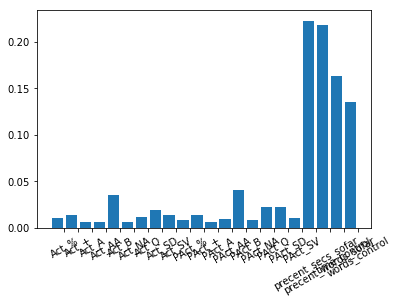

In [94]:
xTrain, xTest, yTrain, yTest = train_test_split(all_features_array, target, test_size=0.30,  random_state=531)
rf = RandomForestClassifier(n_estimators=200)
rf.fit(xTrain,yTrain)

feature_names = X_all.columns.values
x = np.arange(len(feature_names))
plt.bar(x, rf.feature_importances_)
_ = plt.xticks(x + 0.5, feature_names, rotation=30)